# K-means Clustering

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df['age'] = df['age'].fillna(df['age'].mean())

In [8]:
# Creating model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Importing the data in features
X = df[['age', 'fare']]

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing clustering
model = KMeans(n_clusters=3)
model.fit(X_scaled)

# Assigning clustering labels
df['clusters'] = model.labels_

C:\Users\Kabir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,clusters
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [10]:
df['clusters'].unique()

array([1, 2, 0])

<function matplotlib.pyplot.show(close=None, block=None)>

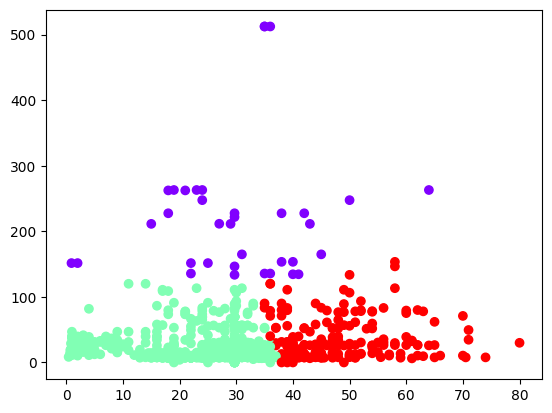

In [11]:
plt.scatter(df['age'], df['fare'], c=df['clusters'], cmap='rainbow')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

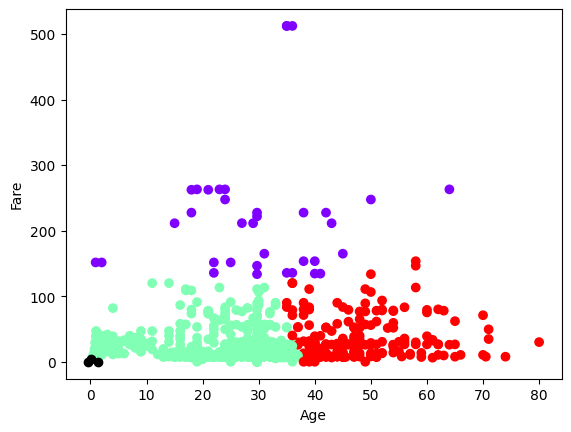

In [12]:
plt.scatter(df['age'], df['fare'], c=df['clusters'], cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='black')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show

In [13]:
pip install mpl_toolkits

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Kabir\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\Kabir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


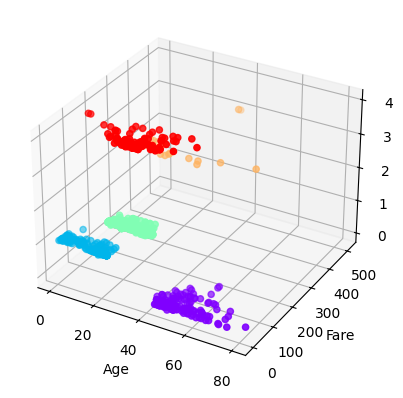

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
X = df[['age', 'fare']]

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing clustering
model = KMeans(n_clusters=5, random_state=42)
model.fit(X_scaled)

# Assigning clustering labels
df['clusters'] = model.labels_

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with 'age', 'fare', and cluster labels
ax.scatter(df['age'], df['fare'], df['clusters'], c=df['clusters'], cmap='rainbow')

# Set labels for the axes
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Cluster')

# Show the plot
plt.show()


In [15]:
import plotly.express as px
fig = px.scatter(df, x='age', y='fare', color='clusters')
fig.update_layout(coloraxis_showscale=False)
fig.show()


In [16]:
pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Kabir\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:
import plotly.express as px
fig = px.scatter_3d(df, x='age', y='fare', z='pclass', color='clusters')
fig.show()

In [18]:
import plotly.express as px
fig = px.scatter_3d(df, x='age', y='fare', z='pclass', symbol='clusters')
fig.show()

In [19]:
fig = px.parallel_coordinates(df, color='clusters', title='Titanic Clusters')
fig.show()

In [20]:
import joblib

In [21]:
joblib.dump(model, 'k-means_clustering.joblib')

['k-means_clustering.joblib']

In [22]:
model_loaded = joblib.load('k-means_clustering.joblib')

In [23]:
import seaborn as sns

df1 = sns.load_dataset('tips')
df1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df1['smoker'])
df1['smoker'] = le.transform(df1['smoker'])

In [33]:
df1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,Sat,Dinner,3
240,27.18,2.00,Female,1,Sat,Dinner,2
241,22.67,2.00,Male,1,Sat,Dinner,2
242,17.82,1.75,Male,0,Sat,Dinner,2


In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df1['day'])
df1['day'] = le.transform(df1['day'])

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df1['time'])
df1['time'] = le.transform(df1['time'])

In [36]:
X = df1.drop('sex', axis=1)
y = df1['sex']

In [37]:
X.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,0,2,0,2
1,10.34,1.66,0,2,0,3
2,21.01,3.50,0,2,0,3
3,23.68,3.31,0,2,0,2
4,24.59,3.61,0,2,0,4


In [38]:
y.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

In [39]:
df1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [40]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(X, y)

In [41]:
joblib.dump(model, 'tips_classification_model.joblib')

['tips_classification_model.joblib']

In [ ]:
model_1 = joblib.load('tips_classification_model.joblib')

In [43]:
import pickle

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [45]:
# Load the model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)